In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
real_df = pd.read_csv("Data set 1 (12 KB) - heart_disease.csv")
df = real_df.copy(deep=True)

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 1) Data preprocessing
* handling missing values
* handling duplicates
* handling outliers
    * using IQR
    * using z-score

### 1a) Checking for missing values

In [48]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 1b) Removing duplicate values

In [3]:
# drop the duplicate rows
df = df.drop_duplicates()
print("before dropping : ", real_df.shape)
print("after dropping : ", df.shape)

before dropping :  (303, 14)
after dropping :  (302, 14)


### 1c) Visualizing outliers

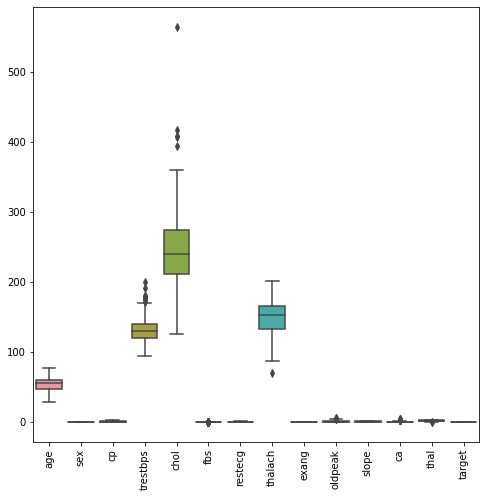

In [6]:
# do a box plot using the dataframe
plt.figure(figsize=(8,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

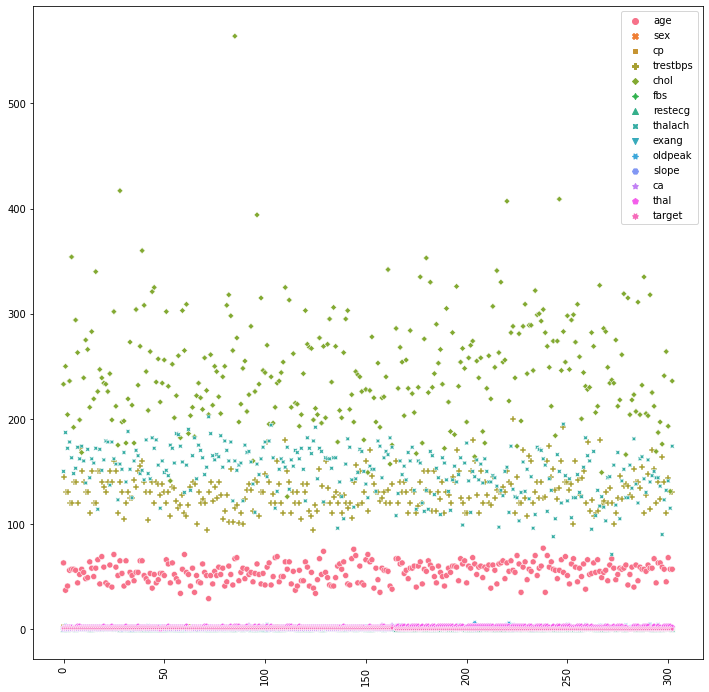

In [41]:
#do a scatter plot using the dataframe
plt.figure(figsize=(12,12))
sns.scatterplot(data=df)
plt.xticks(rotation=90)
plt.show()

### 1ci) Finding outliers using z score

In [4]:
def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

z_outliers = []
for columns in df.columns:
    # check if the column has outliers 
    if(detect_outliers(df[columns]) != [] and detect_outliers(df[columns]) != [0, 0]):
        # store the columns with outliers and the outliers values
        z_outliers.append((columns, detect_outliers(df[columns])))

print(z_outliers)

[('trestbps', [200, 192]), ('chol', [417, 564, 407, 409]), ('thalach', [71]), ('oldpeak', [6.2, 5.6]), ('ca', [4, 4, 4, 4])]


### 1cii) Finding outliers using IQR

In [9]:
# Create an empty list to store the outliers
I_outliers = []

# Iterate over each feature and find outliers
for feature in df.columns:
    # Calculate Q1 and Q3
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Find outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature].tolist()

    if outliers != []:
        # Append feature and its outliers to the list
        I_outliers.append((feature, outliers))

# Print the list of features with their outliers
print(I_outliers)

[('trestbps', [172, 178, 180, 180, 200, 174, 192, 178, 180]), ('chol', [417, 564, 394, 407, 409]), ('fbs', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('thalach', [71]), ('oldpeak', [4.2, 6.2, 5.6, 4.2, 4.4]), ('ca', [3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3]), ('thal', [0, 0])]


* Since there are more outliers detected by IQR, we will remove the outliers based on IQR's outliers (I_outliers)

In [5]:
print("before removing outliers : ",df.shape)

before removing outliers :  (302, 14)


* remove outliers from the dataset based on IQR's outliers

In [11]:
# for feature, outliers_list in I_outliers:
    # df = df[~df[feature].isin(outliers_list)]

* remove outliers from the dataset based on z-score outliers

In [6]:
for feature, outliers_list in z_outliers:
    df = df[~df[feature].isin(outliers_list)]

In [7]:
print("after removing outliers : ",df.shape)

after removing outliers :  (289, 14)


***

## --- Feature selection with Pearson correlation ---

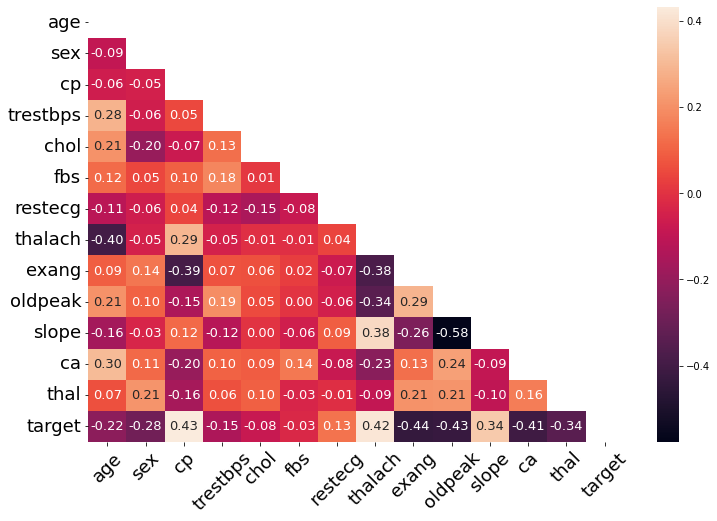

In [14]:
plt.figure(figsize=(12, 8))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
masked_corr = corr.mask(mask)
sns.heatmap(masked_corr, annot=True, annot_kws={"size": 13}, fmt='.2f') 

plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)

plt.show()

## Pick the features with correlation > 0.2

In [8]:
correlationranking = df.corr().abs()['target'].sort_values(ascending=False)
more_important_features = correlationranking[correlationranking>0.2].drop('target')
more_important_features = more_important_features.index.tolist()
more_important_features

['ca', 'exang', 'oldpeak', 'thalach', 'cp', 'thal', 'slope', 'sex', 'age']

## Pick the features with correlation < 0.2

In [9]:
less_important_features = correlationranking[correlationranking < 0.2]
less_important_features = less_important_features.index.tolist()
less_important_features

['restecg', 'trestbps', 'chol', 'fbs']

## -- Feature Selection with sklearn --

In [10]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [11]:
collected_features = []

# function to get the features
def getFeatures(selector):
    # Fit the selector on the data
    selector.fit(X,y)

    # Get the list of features based on column index
    selected_features = X.columns[selector.get_support(indices=True)].tolist()
    print(selected_features)
    
    collected_features.extend(selected_features)

# --- Univariate feature selection ---

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Pick only 5 features with highest f_classif score
selector = SelectKBest(f_classif, k=5)

getFeatures(selector)

['cp', 'thalach', 'exang', 'oldpeak', 'ca']


# --- Recursive feature selection ---

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create the RFE with a LogisticRegression estimator and 5 features to select
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=5, step=1)

getFeatures(selector)

['sex', 'exang', 'slope', 'ca', 'thal']


# --- Tree-based feature selection ---

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

# Create and fit the ExtraTreesClassifier with feature selection
selector = SelectFromModel(ExtraTreesClassifier(n_estimators=100, random_state=65), max_features=5)

getFeatures(selector)

['cp', 'thalach', 'exang', 'ca', 'thal']


# --- L1-based (lasso) feature selection ---


In [15]:
# do feature selection using L1-based feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# pick the top 5 features
selector = SelectFromModel(LinearSVC(penalty='l1', dual=False), max_features=5)

getFeatures(selector)

['sex', 'cp', 'exang', 'ca', 'thal']


* Conclude all feature selection methods by counting the number of times a feature was selected

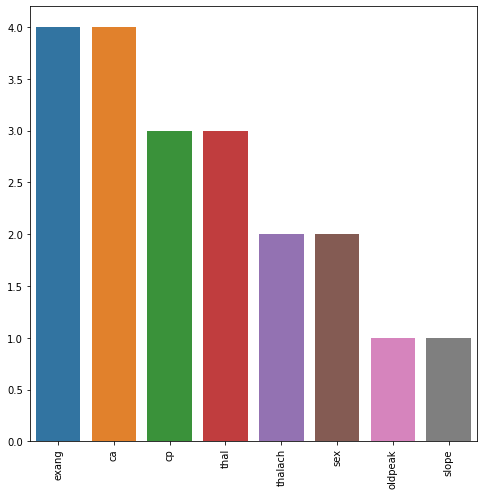

In [16]:
# count and sort the features by their occurence
feature_counts = pd.Series(collected_features).value_counts()

# Plot the result
plt.figure(figsize=(8,8))
sns.barplot(x=feature_counts.index, y=feature_counts.values)
plt.xticks(rotation=90)
plt.show()


In [66]:
print("more_important_features : ", more_important_features)
print("less_important_features : ", less_important_features)
print("all / top 8 collected_features from sklearn: ", feature_counts.index.tolist())
print("top 5 collected_features from sklearn: ", feature_counts.index[:5].tolist())

more_important_features :  ['exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age']
less_important_features :  ['trestbps', 'restecg', 'chol', 'fbs']
all / top 8 collected_features from sklearn:  ['exang', 'ca', 'cp', 'thal', 'thalach', 'sex', 'oldpeak', 'slope']
top 5 collected_features from sklearn:  ['exang', 'ca', 'cp', 'thal', 'thalach']


## EDA

<Figure size 720x432 with 0 Axes>

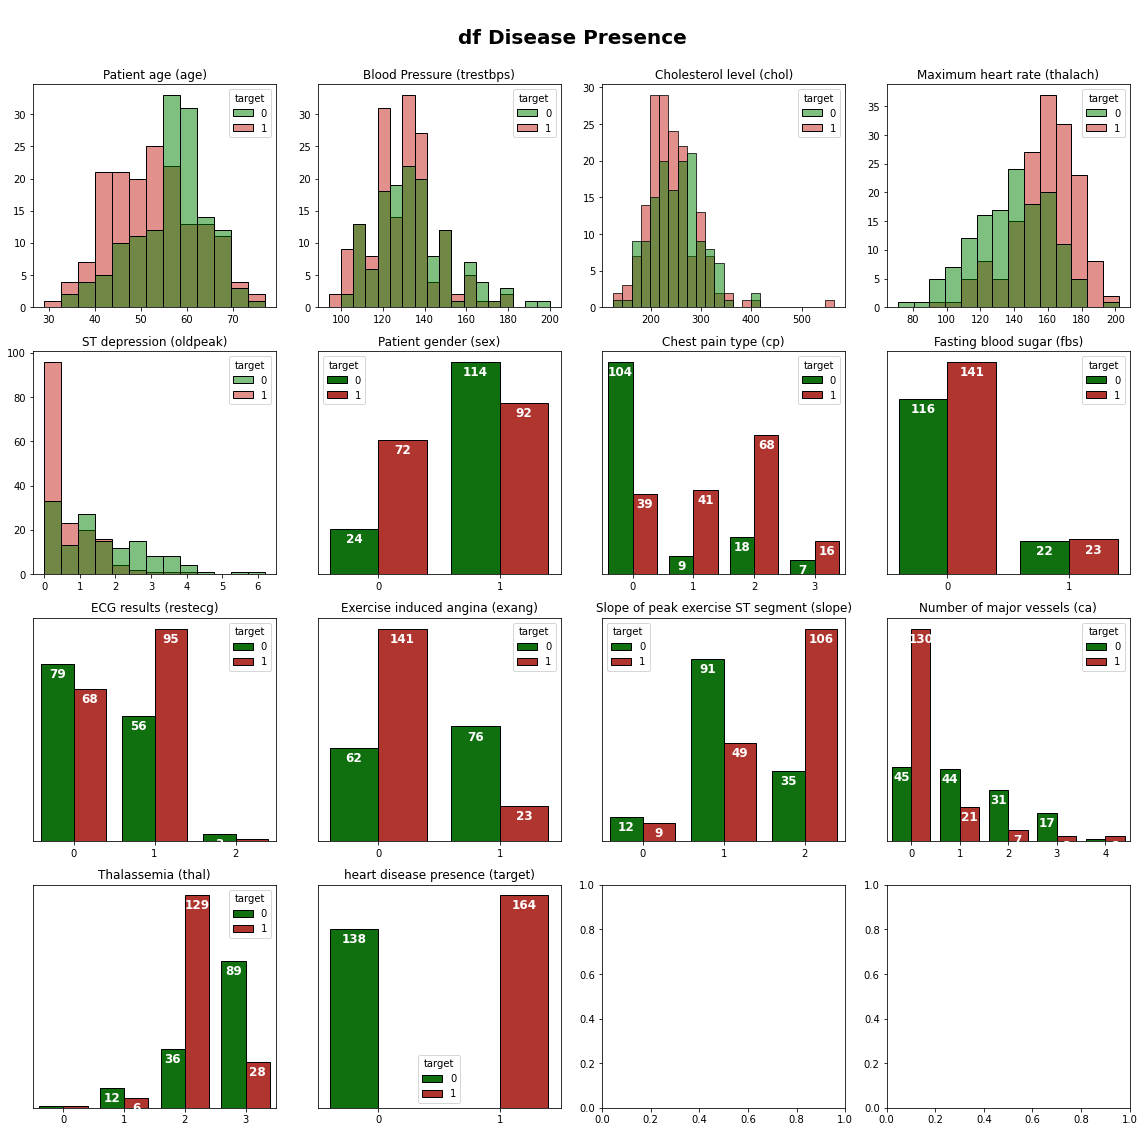

In [25]:

# Add a legend for the entire subplot
plt.figure(figsize=(10, 6))

# Define the columns to analyze
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Define the column descriptions
descriptions = {
    'age': 'Patient age (age)',
    'trestbps': 'Blood Pressure (trestbps)',
    'chol': 'Cholesterol level (chol)',
    'thalach': 'Maximum heart rate (thalach)',
    'oldpeak': 'ST depression (oldpeak)',
    'sex': 'Patient gender (sex)',
    'cp': 'Chest pain type (cp)',
          'fbs': 'Fasting blood sugar (fbs)',
          'restecg': 'ECG results (restecg)',
          'exang': 'Exercise induced angina (exang)',
          'slope': 'Slope of peak exercise ST segment (slope)',
          'ca': 'Number of major vessels (ca)',
          'thal': 'Thalassemia (thal)',
          'target': 'heart disease presence (target)'
}

# Create a figure with subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('\ndf Disease Presence\n', fontsize=20, fontweight='bold')

# Define the color palette
palette = {0: 'green', 1: '#C52219'}

# Loop through the columns and plot the charts
for i, cols in enumerate(descriptions.keys()):
    # Get the row and column index of the subplot
    row = i // 4
    col = i % 4

    # Check if the column should use histplot or barplot
    if cols in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
        # Plot the histplot with seaborn
        sns.histplot(data=df, x=cols, hue="target", ax=axes[row][col], palette=palette)
    else:
        # Plot the countplot with seaborn
        sns.countplot(data=df, x=cols, hue="target", ax=axes[row][col], palette=palette, linewidth=1, edgecolor='black')
        
        # Turn off the y-axis
        axes[row][col].get_yaxis().set_visible(False)

        # Add annotations to the countplot
        for p in axes[row][col].patches:
            axes[row][col].annotate(format(p.get_height(), '.0f'),
                                    (p.get_x() + p.get_width() / 2., p.get_height()),
                                    ha='center', va='center',
                                    xytext=(0, -10),
                                    textcoords='offset points',
                                    color='white',
                                    fontsize=12,
                                    fontweight='bold')

    # Set the title and labels
    axes[row][col].set_title(descriptions[cols])
    axes[row][col].set_xlabel("")
    axes[row][col].set_ylabel("")

# Adjust the layout and show the figure
plt.tight_layout()
plt.show()

In [17]:
# import libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

# all features
# X = df.drop(['target'], axis=1)

# based on more important features
# X = df[more_important_features]

# based on less important features
# X = df[less_important_features]

# based on top 8 features
X = df[feature_counts.index.tolist()]

# based on top 5 features
# X = df[feature_counts.index[:5].tolist()]

# target
y = df['target']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# import models
import timeit
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

models = [
    ("KNN", KNeighborsClassifier(), 
        {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 
         'weights': ['uniform', 'distance'],
         'algorithm' : ['auto', 'ball_tree','kd_tree'],
         'p': [1, 2, 3, 4]}),
    
    ("Naive Bayes Bernoulli", BernoulliNB(), 
        {'alpha': [0.1, 1, 10], 
         'fit_prior': [True, False],
         'binarize': [0.0, 0.5, 1.0]}),
    
    ("SVM", SVC(), 
       {'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        # 'degree' : [2,3,4,5],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})
]

# create 2 empty dataframes to store the output
row_names = ['best accuracy', 'best_params', 'precision', 'recall', 'confusion matrix']
df_beforeTuned = pd.DataFrame(index=['cv mean accuracy','training time'])
df_Tuned = pd.DataFrame(index=row_names)

# loop through each model and fit, predict, and score with and without using GridSearchCV
for name, model, param_grid in models:
    print(f"Now training {name} model")
    # start timer to calculate the time taken to cross validate
    startTimer = timeit.default_timer()
    
    '''before tuning the hyperparameters'''
    cv = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    
    # calculate the time taken to cross validate
    endTimer = timeit.default_timer() - startTimer
    
    # calculate and store the accuracy of each model in the output dataframe
    df_beforeTuned.loc['cv mean accuracy',name] = cv.mean()
    df_beforeTuned.loc['training time', name] = endTimer
    
    '''tuning the hyperparameters'''
    # create a GridSearchCV instance for the current model
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
    
    # fit the model on the scaled training data
    grid_search.fit(X_train, y_train)
    
    # predict on the test data using the best estimator found by GridSearchCV
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # calculate and store the accuracy of each model in the output dataframe
    df_Tuned.loc['best accuracy', name] = round(grid_search.best_estimator_.score(X_test, y_test),3)
    df_Tuned.loc['best_params', name] = str(grid_search.best_params_)
    df_Tuned.loc['precision', name] = round(precision_score(y_test, y_pred),4)
    df_Tuned.loc['recall', name] = round(recall_score(y_test, y_pred),4)
    df_Tuned.loc['confusion matrix', name] = str(confusion_matrix(y_test,y_pred)).replace('\n', '')

Now training KNN model
Fitting 5 folds for each of 168 candidates, totalling 840 fits
Now training Naive Bayes Bernoulli model
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Now training SVM model
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [19]:
df_combined = pd.concat([df_beforeTuned.T, df_Tuned.T], axis=1)
df_summary = df_combined.sort_values(by="best accuracy", ascending=False)
df_summary = df_summary[['best accuracy', 'cv mean accuracy', 'training time', 'precision', 'recall', 'confusion matrix', 'best_params']]
df_summary

,best accuracy,cv mean accuracy,training time,precision,recall,confusion matrix,best_params
KNN,0.914,0.822109,2.764188,0.9333,0.9032,[[25 2] [ 3 28]],"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1..."
SVM,0.897,0.826457,0.042299,0.8788,0.9355,[[23 4] [ 2 29]],"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}"
Naive Bayes Bernoulli,0.879,0.822202,0.013026,0.9286,0.8387,[[25 2] [ 5 26]],"{'alpha': 0.1, 'binarize': 0.0, 'fit_prior': F..."


In [22]:
print(X.shape)
print(X.columns)

(289, 8)
Index(['exang', 'ca', 'cp', 'thal', 'thalach', 'sex', 'oldpeak', 'slope'], dtype='object')


***

***

# testing all combinations of features

# combination
(forgot to remove 1 duplicate row)
1. split data random state 42
2. split data random state 65

3. remove outliers based on IQR (more outliers)
4. remove outliers based on z-score

5. all features
6. more important features (corr > 0.2)
6a. less important features (corr < 0.2)
7. all 8 top features from sklearn feature selection
8. top 5 features selection by sklearn

1,5
<br>2,5
<br>1,6
<br>2,6
<br>1,7
<br>2,7
<br>1,8
<br>2,8
<br>1,5,3
<br>2,5,3
<br>1,6,3
<br>2,6,3
<br>1,7,3
<br>2,7,3
<br>1,8,3
<br>2,8,3
<br>1,5,4
<br>2,5,4
<br>1,6,4
<br>2,6,4
<br>1,7,4
<br>2,7,4
<br>1,8,4
<br>2,8,4
<br>1,6a
<br>2,6a
<br>1,6a,3
<br>2,6a,3
<br>1,6a,4
<br>2,6a,4

In [29]:
# appending results
# df_summary['combination'] = "2,6a,4"
# df_summary = df_summary[['combination', 'best accuracy', 'cv mean accuracy', 'precision', 'recall', 'confusion matrix', 'training time', 'best_params']]

# # first time
# # combination_accuracy = df_summary.copy(deep=True)

# # after first time
# combination_accuracy = combination_accuracy.append(df_summary) 

# # Print the combined DataFrame
# combination_accuracy

In [30]:
# export to csv
# combination_accuracy.to_csv('C:/Users/User/Desktop/combination_accuracy.csv')

In [31]:
# summarycombination = combination_accuracy.copy(deep=True)

In [32]:
# # selected the highest best accuracy for each combination
# df_sorted = summarycombination.sort_values(by="best accuracy", ascending=False)
# grouped = df_sorted.groupby('combination')
# highest_scores = grouped.head(1)
# highest_scores.shape

In [33]:
# highest_scores.to_csv('C:/Users/User/Desktop/highest_scores.csv')

In [34]:
# highest_scores